In [103]:
%matplotlib notebook
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import csv
import geopandas as gpd
import shapely.geometry as sgeo

In [63]:
crime19 = gpd.read_file('data/nypd_complaint_2019_geo.geojson')
crime20 = gpd.read_file('data/nypd_complaint_2020_geo.geojson')


In [64]:
crime19

,boro_cd,shape_area,shape_leng,case_num,geometry
0,101,42689119.0133,74168.5878924,117,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,102,37689205.9401,34130.5952768,91,"POLYGON ((-73.99684 40.73736, -73.99362 40.736..."
2,103,46879779.2986,30695.6409632,166,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
3,104,49311715.1126,67623.6699012,152,"POLYGON ((-73.99394 40.77318, -73.99370 40.773..."
4,105,43790329.8699,35288.1885095,217,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
...,...,...,...,...,...
66,502,592715674.432,143044.989836,71,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ..."
67,503,599053419.389,193564.186317,89,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ..."
68,595,54734567.3489,110147.254437,1,"MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ..."
69,203,44803080.7253,33500.8967412,74,"POLYGON ((-73.88072 40.83752, -73.88074 40.837..."


<IPython.core.display.Javascript object>


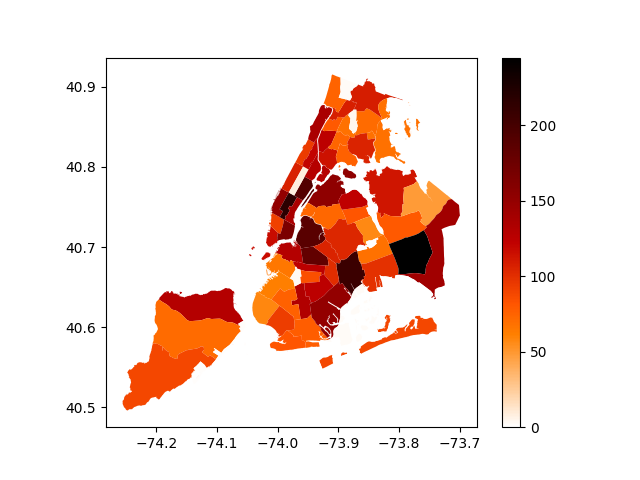

<AxesSubplot:>

In [65]:
crime19.plot(column='case_num', legend=True, cmap='gist_heat_r')

<IPython.core.display.Javascript object>


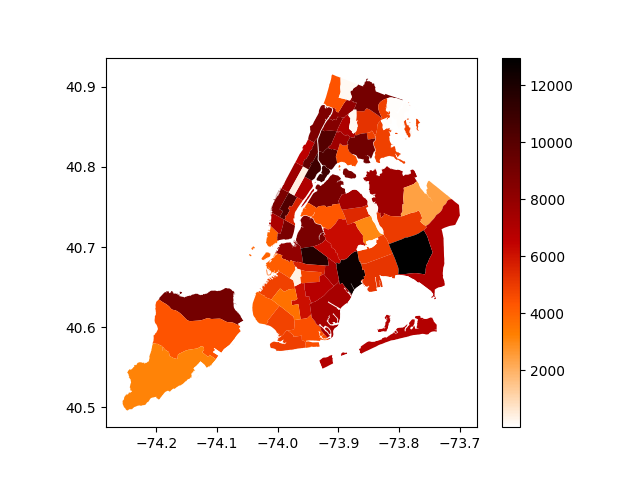

<AxesSubplot:>

In [66]:
crime20.plot(column='case_num', legend=True, cmap='gist_heat_r')

## Relative Crime Index
RCI = case_num / mean(case_num)

In [67]:
mean20 = crime20['case_num'].mean()
crime20['RCI'] = crime20['case_num'] / mean20
crime20['RCI']

0     0.699789
1     1.248045
2     1.546025
3     1.537431
4     1.791390
        ...   
66    0.767663
67    0.556850
68    0.005963
69    1.335738
70    1.606709
Name: RCI, Length: 71, dtype: float64

In [68]:
mean19 = crime19['case_num'].mean()
crime19['RCI'] = crime19['case_num'] / mean19
crime19['RCI']

0     1.265347
1     0.984158
2     1.795278
3     1.643869
4     2.346839
        ...   
66    0.767860
67    0.962529
68    0.010815
69    0.800305
70    1.146382
Name: RCI, Length: 71, dtype: float64

In [69]:
RCI_diff = crime20[['geometry']]
RCI_diff['diff'] = crime20['RCI'] - crime19['RCI']

/home/hooley/miniconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<IPython.core.display.Javascript object>


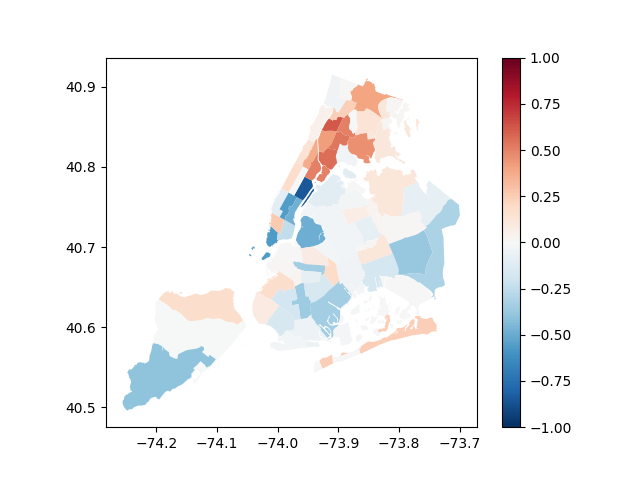

<AxesSubplot:>

In [70]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
RCI_diff.plot(column='diff', legend=True, cmap='RdBu_r', norm=norm)

It seems that Manhattan' CRI decreased and Broxn's CRI increased. Other distrits has smaller or even unnoticable changes

# Covid-19

In [142]:
covid = gpd.read_file('data/covid_geo.geojson')
covid

,boro_cd,shape_area,shape_leng,case_num,test_num,geometry
0,101,42689119.0133,74168.5878924,4274,62339,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,102,37689205.9401,34130.5952768,2584,39300,"POLYGON ((-73.99684 40.73736, -73.99362 40.736..."
2,103,46879779.2986,30695.6409632,11170,122724,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
3,104,49311715.1126,67623.6699012,8069,112801,"POLYGON ((-73.99394 40.77318, -73.99370 40.773..."
4,105,43790329.8699,35288.1885095,0,0,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
...,...,...,...,...,...,...
66,502,592715674.432,143044.989836,19955,110714,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ..."
67,503,599053419.389,193564.186317,22539,122464,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ..."
68,595,54734567.3489,110147.254437,0,0,"MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ..."
69,203,44803080.7253,33500.8967412,7499,51735,"POLYGON ((-73.88072 40.83752, -73.88074 40.837..."


<AxesSubplot:>

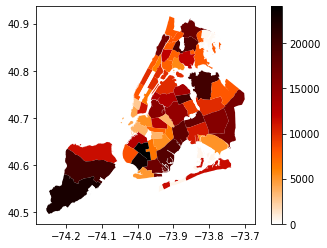

In [143]:
covid_geo.plot(column='case_num', legend=True, cmap='gist_heat_r')

In [144]:
covid_crime = covid[['case_num']]
covid_crime = covid_crime.rename(columns={'case_num':'covid_case_num'})
covid_crime['crime_case_num'] = crime20['case_num']
covid_crime

,covid_case_num,crime_case_num
0,4274,3990
1,2584,7116
2,11170,8815
3,8069,8766
4,0,10214
...,...,...
66,19955,4377
67,22539,3175
68,0,34
69,7499,7616


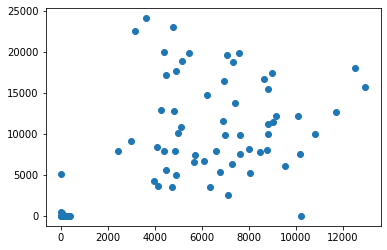

In [145]:
%matplotlib inline
plt.scatter(covid_crime['crime_case_num'], covid_crime['covid_case_num'])

In [146]:
covid_crime['covid_case_num'].corr(covid_crime['crime_case_num'])

0.4470543826439716

## Covid case / test number

In [147]:
covid_crime['ct_rate'] = covid['case_num'] / covid['test_num']
covid_crime = covid_crime.fillna(0)
covid_crime

,covid_case_num,crime_case_num,ct_rate
0,4274,3990,0.068561
1,2584,7116,0.065751
2,11170,8815,0.091017
3,8069,8766,0.071533
4,0,10214,0.000000
...,...,...,...
66,19955,4377,0.180239
67,22539,3175,0.184046
68,0,34,0.000000
69,7499,7616,0.144950


In [152]:
covid_crime = covid_crime[covid_crime.ct_rate != 0]
covid_crime = covid_crime[covid_crime.crime_case_num != 0]
covid_crime

,covid_case_num,crime_case_num,ct_rate
0,4274,3990,0.068561
1,2584,7116,0.065751
2,11170,8815,0.091017
3,8069,8766,0.071533
5,6534,5660,0.067088
...,...,...,...
65,11430,9038,0.165895
66,19955,4377,0.180239
67,22539,3175,0.184046
69,7499,7616,0.144950


In [155]:
covid_crime['covid_case_num'].corr(covid_crime['crime_case_num'])

0.20625490640192484

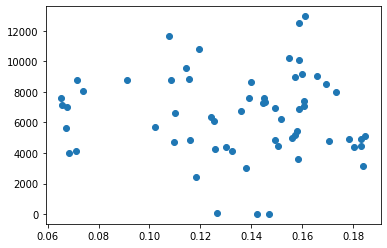

In [159]:
plt.scatter(covid_crime['ct_rate'], covid_crime['crime_case_num'])